<h6 style= 'color: red'>   Где дешевле жить? Предсказание цен в Airbnb - учимся генерировать признаки и интерпретировать результаты модели </h6>

<h6 style= 'color: blue'> В этом проекте я потренировался строить интерпретируемые модели линейной регрессии с регуляризацией и без, а также придумывать новые признаки для
улучшения качества модели.</h6>

####
- Часть 1. EDA

Скачайте данные с Kaggle по ценам на жильё в Airbnb в Нью-Йорке:
https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data
Пройдите по основным шагам работы с данными:
выкиньте ненужные признаки: id, name, host_id, host_name, last_review
визуализируйте базовые статистики данных: распределения признаков, матрицу попарных корреляций, постройте pair plots
про результатам анализа произведите предобработку переменных

- Часть 2. Preprocessing & Feature Engineering
Ваша цель получить как можно более высокие метрики качества (можно взять несколько, R2, MAE, RMSE), сконцентрировавшись на преобразовании признаков.
Опробуйте различные техники:
работа с категориальными переменными (можно начать с dummy);
замена аномалий;
различные варианты шкалирования непрерывных переменных (StandardScaler, RobustScaler, и.т.д.);
обратите внимание на распределение целевой переменной, возможно, с ней тоже можно поработать;
Попробуйте на основании имеющихся переменных создать новые, которые могли бы улучшить качество модели. Например, можно найти координаты Манхэттена (самого дорогого района) и при помощи широты и долготы, а также евклидового расстояния создать новую переменную - расстояние от квартиры до этого района. Возможно, такой признак будет работать лучше, чем просто широта и долгота.
- Часть 3. Моделирование
Отложите 30% данных для тестирования.
Постройте модели простой линейной регрессии, RidgeCV, LassoCV и ElasticNetCV.
Измерьте качество каждой и визуализируйте важность признаков.
Сделайте интересные выводы :)
В ноутбуке желательно видеть:
Понятное описание: какие техники и алгоритмы были опробованы - было бы неплохо в самом начале тезисно выписать опробованные методики и их результат (помогло / не помогло).
Наличие визуализаций (не обязательно строить много графиков - можно несколько репрезентативных).
Наличие хотя бы одной модификации данных, приводящей к улучшению результатов.

#### Измерение:

####
- Измерены качества модели:
Linear Regression: R2 = 0.508, MAE = 0.352, RMSE = 0.482
RidgeCV: R2 = 0.508, MAE = 0.352, RMSE = 0.482
LassoCV: R2 = 0.509, MAE = 0.351, RMSE = 0.481
ElasticNetCV: R2 = 0.509, MAE = 0.351, RMSE = 0.481

### Выводы:
- Модели RidgeCV, LassoCV и ElasticNetCV имеют почти такие же значения метрик, как и модель линейной регрессии. Это означает, что регуляризация не дала значительного улучшения качества модели на этих данных.
- Модели LassoCV и ElasticNetCV имеют немного лучшие значения метрик, чем модели линейной регрессии и RidgeCV. Это означает, что L1-регуляризация, которая может обнулять незначимые коэффициенты признаков, дала небольшой прирост точности модели.
- Все модели имеют низкие значения R2 и высокие значения MAE и RMSE. Это означает, что модели не очень хорошо предсказывают логарифм цены на жилье в Airbnb в Нью-Йорке. 
- Возможно, это связано с тем, что данные не линейны или имеют много шума или выбросов.

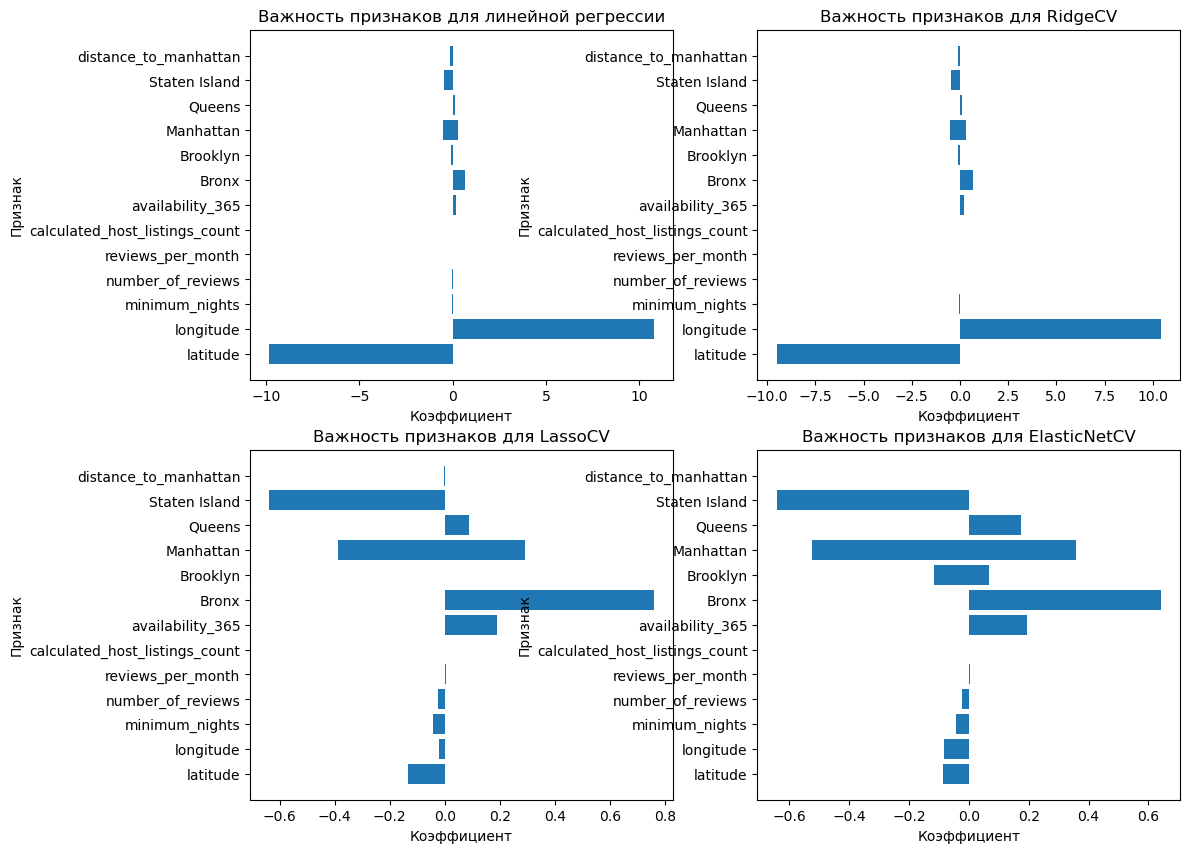

In [343]:
# Визуализация важности признаков для каждой модели с помощью горизонтальных столбчатых диаграмм

# Импортируем библиотеку matplotlib.pyplot для построения графиков
import matplotlib.pyplot as plt

# Создаем фигуру с четырьмя подграфиками
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Настраиваем заголовки и подписи осей для каждого подграфика
axes[0, 0].set_title('Важность признаков для линейной регрессии')
axes[0, 0].set_xlabel('Коэффициент')
axes[0, 0].set_ylabel('Признак')
axes[0, 1].set_title('Важность признаков для RidgeCV')
axes[0, 1].set_xlabel('Коэффициент')
axes[0, 1].set_ylabel('Признак')
axes[1, 0].set_title('Важность признаков для LassoCV')
axes[1, 0].set_xlabel('Коэффициент')
axes[1, 0].set_ylabel('Признак')
axes[1, 1].set_title('Важность признаков для ElasticNetCV')
axes[1, 1].set_xlabel('Коэффициент')
axes[1, 1].set_ylabel('Признак')

# Строим горизонтальные столбчатые диаграммы для коэффициентов признаков для каждой модели на соответствующем подграфике
axes[0, 0].barh(X.columns, reg.coef_)
axes[0, 1].barh(X.columns, ridge.coef_)
axes[1, 0].barh(X.columns, lasso.coef_)
axes[1, 1].barh(X.columns, elastic.coef_)

# Показываем фигуру с графиками
plt.show()


### Часть I - EDA
- провести анализ EDA (Exploratory Data Analysis).

In [344]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler

In [345]:
# подгружаем данные, назовем переменную data, для удобства.
data = pd.read_csv('AB_NYC_2019.csv')
# Просматриваем первые пять строк датафрейма
data.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [346]:
sorted(data.columns.tolist())
# смотрим на колонки

['availability_365',
 'calculated_host_listings_count',
 'host_id',
 'host_name',
 'id',
 'last_review',
 'latitude',
 'longitude',
 'minimum_nights',
 'name',
 'neighbourhood',
 'neighbourhood_group',
 'number_of_reviews',
 'price',
 'reviews_per_month',
 'room_type']